Shivansh Chaturvedi
GR5073 - Midterm

In [306]:
from google.colab import drive
drive.mount('/content/drive')

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### (1) Import the spam dataset and print the first six rows.  



In [307]:
import pandas as pd
import numpy as np

#importing and reading
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine Learning/HW Midterms/spam_dataset.csv")
print(df.shape)
df.head(n=6)

(4601, 58)


,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


#### (2) Read through the documentation of the original dataset here:

http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names

The dependent variable is "spam" where one indicates that an email is spam and zero otherwise.  Which three variables in the dataset do you think will be important predictors in a model of spam?  Why?

I would guess that 3 important predictors would be:
1. capital_run_length_average: Spam email often isn't well formatted and will be prone to run-on sentences with poor capitalization.
2. word_freq_free: Spam email is also enticing for offering 'free' things, so this word frequency should capture such instances.
3. word_freq_credit: Spam email could target those with poor credit scores offering to raise it, or will ask for credit card details, this should capture those

#### (3) Visualize the univariate distribution of each of the variables in the previous question.  

Text(0, 0.5, 'Count')

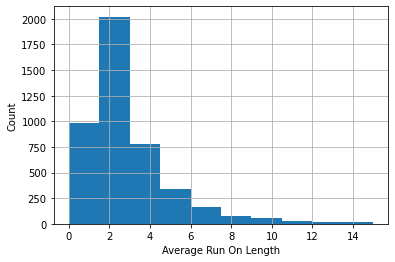

In [346]:
from matplotlib import pyplot as plt 
%matplotlib inline

# visualizing capital_run_length_average:
df['capital_run_length_average:'].hist(range=[0, 15])
plt.xlabel('Average Run On Length')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

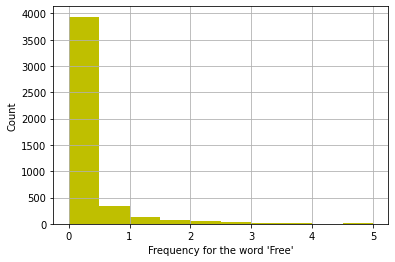

In [352]:
# visualizing word_freq_free:
df['word_freq_free:'].hist(range=[0, 5], color='y')
plt.xlabel("Frequency for the word 'Free'")
plt.ylabel('Count')

Text(0, 0.5, 'Count')

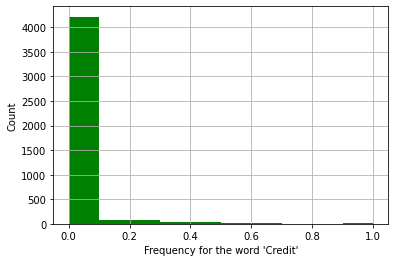

In [350]:
# visualizing word_freq_credit:
df['word_freq_credit:'].hist(range=[0, 1], color='g')
plt.xlabel("Frequency for the word 'Credit'")
plt.ylabel('Count')

#### (4) Name each of the supervised learning models that we have learned thus far that are used to predict dependent variables like "spam".   

We have covered K-Nearest Neighbor (Classifier), OneHotEncoders, Logistic Regression, Penalized Logistic Regression, Decision Trees Classifier, Random Forests Classifier (bagging, boosting), Support Vector Machines



#### (5) Describe the importance of training and test data.  Why do we separate data into these subsets?

Splitting data is an important part of data science, as it helps make models more accurate. In machine learning, data can be split into test and training data. The training data is used to fit the model and train it to determine a prediction and to gain an understanding of the data. The test data set is then used to compare results of models. Splitting up the data to 'train' and 'test' can be used to prevent overfitting a model and to ensure that the model is able to generate results that are accurate and useful. A train-test split is an effective way to check is a model has learned the data and is able to use it to generate results; however, the model is only 'scored' or evaluated on the results of the test data.

#### (6) What is k-fold cross validation and what do we use it for?



K-Fold cross-validation is the process of splitting up machine learning input data into "k" number of "folds" or groups; for example, when k=10, the data is split into 10 different groups. 

Cross-validation is a way to measure and evaluate machine learning models based on input data. In k-fold cross-validation, the test and training data and cycled through: in one iteration, a first section will be used as test data while the others will be used for training, and then scored. This process will continue through all the folds to get a good test and training score. By holding one section as test and running the k-1 sections as training, it is possible to get a better score and evaluation of the model, with reduced bias in the data. 

#### (7) How is k-fold cross validation different from stratified k-fold cross validation?

Stratified K-Fold Cross Validation (SKFCV) is a slightly more advanced version of K-Fold Cross Validation (KFCV). In SKFCV, the above described splits in data (folds) will also retain certain properties of the whole dataset; for example, a percentage or proportion of observations with a specific kind of label or attribute. SKFCV is thus a little less random, but can be more accurate and can help improve models in some cases. 

#### (8) Choose one model from question four.  Split the data into training and test subsets.  Build a model with the three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k).  Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  

In [311]:
# I will use KNN Classifier for this question
from sklearn.neighbors import KNeighborsClassifier

# keeping only three variables + the dependent variable
df2 = df[['capital_run_length_average:','word_freq_free:','word_freq_credit:','spam']]
df2.head()

# splitting data into y and x
y = df2['spam']
X = df2.loc[:, df2.columns != 'spam']

In [312]:
# test train split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(X.shape)
print(X_train.shape)
print(X_test.shape)

# Scaling all the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

(4601, 3)
(3450, 3)
(1151, 3)


In [313]:
# using GridSearchCV to tune parameters for the model
from sklearn.model_selection import GridSearchCV

# List a set of potential parameters
knn_param_grid = {'n_neighbors': np.arange(1, 20, 2)}
knngrid = GridSearchCV(KNeighborsClassifier(), param_grid=knn_param_grid)
knngrid.fit(X_train, y_train)

print("Best Parameters: {}".format(knngrid.best_params_))

Best Parameters: {'n_neighbors': 11}


In [314]:
# importing cross val & mean for score calculations; KFold for kfold CV
from sklearn.model_selection import cross_val_score
from statistics import mean 
from sklearn.model_selection import KFold

knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
kfold = KFold()

print("KNN CLASSIFER (SCALED) SCORES")
print("Test Set Score: {:.3f}".format(knn.score(X_test, y_test)))
print("Mean Cross Validation Score using KFold: {:.3f}".format(np.mean(cross_val_score(knn, X_train, y_train, cv=kfold))))
knn_test_score = knn.score(X_test, y_test)
knn_mean_score = np.mean(cross_val_score(knn, X_train, y_train, cv=kfold))

print("\n")

print("I used GridSearchCV to decide on a specific value of K: this value came out to be n=11.")

KNN CLASSIFER (SCALED) SCORES
Test Set Score: 0.808
Mean Cross Validation Score using KFold: 0.817


I used GridSearchCV to decide on a specific value of K: this value came out to be n=11.


#### (9) Choose a second model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k).  Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous model?

In [315]:
# I will use random forest classifier for this question
from sklearn.ensemble import RandomForestClassifier

forest_param_grid = {'criterion':['gini','entropy'],'max_depth':np.arange(1, 10), 'n_estimators':np.arange(1, 10)}
forestgrid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=forest_param_grid)
forestgrid.fit(X_train, y_train)

print("Best Parameters: {}".format(forestgrid.best_params_))

Best Parameters: {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 9}


In [326]:
forest = RandomForestClassifier(criterion = 'gini', max_depth = 6, n_estimators = 9, random_state=42)
forest.fit(X_train, y_train)

print("RANDOM FOREST (SCALED) SCORES")
print("Test set score: {:.3f}".format(forest.score(X_test, y_test)))
print("Mean Cross Validation Score using KFold: {:.3f}".format(np.mean(cross_val_score(forest, X_train, y_train, cv=kfold))))
forest_test_score = forest.score(X_test, y_test)
forest_mean_score = np.mean(cross_val_score(forest, X_train, y_train, cv=kfold))

print("\n")

print("I used GridSearchCV to decide on some of the parameters for RandomForestClassifier (I did not do all possible parameters as it was computationally expensive) and found that.")
print("the best results were at 'criterion': 'gini', 'max_depth': 6, 'n_estimators': 9")

print("\n")

print("Other Model Results So Far")
print("KNN Test Set Score: {:.3f}".format(knn_test_score))
print("KNN Mean CV Score: {:.3f}".format(knn_mean_score))

print("\n")

print("The Random Forest model was better than the KNNClassifier Model for both Mean Score and Test Score.")

RANDOM FOREST (SCALED) SCORES
Test set score: 0.810
Mean Cross Validation Score using KFold: 0.826


I used GridSearchCV to decide on some of the parameters for RandomForestClassifier (I did not do all possible parameters as it was computationally expensive) and found that.
the best results were at 'criterion': 'gini', 'max_depth': 6, 'n_estimators': 9


Other Model Results So Far
KNN Test Set Score: 0.808
KNN Mean CV Score: 0.817


The Random Forest model was better than the KNNClassifier Model for both Mean Score and Test Score.


#### (10) Choose a third model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous models?



In [327]:
# I will use logistic regression for this question
from sklearn.linear_model import LogisticRegression

logreg_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
logreggrid = GridSearchCV(LogisticRegression(random_state=42), param_grid=logreg_param_grid)
logreggrid.fit(X_train, y_train)

print("Best Parameters: {}".format(logreggrid.best_params_))

Best Parameters: {'C': 100}


In [335]:
logreg = LogisticRegression(penalty = 'none', C=100, random_state=42)
logreg.fit(X_train, y_train)

print("LOGISTIC REGRESSION (SCALED) SCORES")
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))
print("Mean Cross Validation Score using KFold: {:.3f}".format(np.mean(cross_val_score(logreg, X_train, y_train, cv=kfold))))
logreg_test_score = logreg.score(X_test, y_test)
logreg_mean_score = np.mean(cross_val_score(logreg, X_train, y_train, cv=kfold))

print("\n")

print("I used GridSearchCV to find that the best C value for an unpenalized Logistic Regression is C=100")

print("\n")

print("Other Model Results So Far")
print("KNN Test Set Score: {:.3f}".format(knn_test_score))
print("KNN Mean CV Score: {:.3f}".format(knn_mean_score))
print("Forest Test Set Score: {:.3f}".format(forest_test_score))
print("Forest Mean CV Score: {:.3f}".format(forest_mean_score))

print("\n")

print("The Logistic Regression model was not better than the Random Forest Model or than the KNN Classifier Model.")

LOGISTIC REGRESSION (SCALED) SCORES
Test set score: 0.770
Mean Cross Validation Score using KFold: 0.775


I used GridSearchCV to find that the best C value for an unpenalized Logistic Regression is C=100


Other Model Results So Far
KNN Test Set Score: 0.808
KNN Mean CV Score: 0.817
Forest Test Set Score: 0.810
Forest Mean CV Score: 0.826


The Logistic Regression model was not better than the Random Forest Model or than the KNN Classifier Model.


#### (11) Choose a fourth model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous models?


In [329]:
# I will use Decision Tree Classifier for this question
from sklearn.tree import DecisionTreeClassifier

tree_param_grid = {'criterion':['gini','entropy'],'max_depth': np.arange(1, 10), 'min_samples_leaf':np.arange(1,10)}
treegrid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=tree_param_grid)
treegrid.fit(X_train, y_train)

print("Best Parameters: {}".format(treegrid.best_params_))

Best Parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 7}


In [341]:
tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 8, min_samples_leaf = 7, random_state=42)
tree.fit(X_train,y_train)

print("TREE MODEL (SCALED) SCORES")
print("Test set score: {:.3f}".format(tree.score(X_test, y_test)))
print("Mean Cross Validation Score using KFold: {:.3f}".format(np.mean(cross_val_score(tree, X_train, y_train, cv=kfold))))
tree_test_score = tree.score(X_test, y_test)
tree_mean_score = np.mean(cross_val_score(tree, X_train, y_train, cv=kfold))

print("\n")

print("I used GridSearchCV to find that the best parameters for this Tree Model are 'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 7")

print("\n")

print("Other Model Results So Far")
print("KNN Test Set Score: {:.3f}".format(knn_test_score))
print("KNN Mean CV Score: {:.3f}".format(knn_mean_score))
print("Forest Test Set Score: {:.3f}".format(forest_test_score))
print("Forest Mean CV Score: {:.3f}".format(forest_mean_score))
print("Logistic Regression Test Set Score: {:.3f}".format(logreg_test_score))
print("Logistic Regression Mean CV Score: {:.3f}".format(logreg_mean_score))

print("\n")

print("The Tree Model was better than the Logistic Regression.") 
print("It was, however, not better than the Random Forest Model and KNN Classifier Model.")

TREE MODEL (SCALED) SCORES
Test set score: 0.802
Mean Cross Validation Score using KFold: 0.815


I used GridSearchCV to find that the best parameters for this Tree Model are 'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 7


Other Model Results So Far
KNN Test Set Score: 0.808
KNN Mean CV Score: 0.817
Forest Test Set Score: 0.810
Forest Mean CV Score: 0.826
Logistic Regression Test Set Score: 0.770
Logistic Regression Mean CV Score: 0.775


The Tree Model was better than the Logistic Regression.
It was, however, not better than the Random Forest Model and KNN Classifier Model.


#### (12) Now rerun your best model from questions 8 through 11, but this time add three new variables to the model that you think will increase prediction accuracy.   Did this model predict test data better than your previous models?  



In [337]:
# I will use Random Forest Classifier for this question, as it gave me the best Test Set Score above

# having six variables total + the dependent variable (I added variables for 'receive', 'money' and '!')
df3 = df[['capital_run_length_average:','word_freq_free:','word_freq_credit:', 'word_freq_receive:', 'word_freq_money:', 'char_freq_!:', 'spam']]

# splitting data into y and x
y2 = df3['spam']
X2 = df3.loc[:, df3.columns != 'spam']

In [338]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train2)
X_train2 = scaler.transform(X_train2)
X_test2 = scaler.transform(X_test2)

In [354]:
forest.fit(X_train2, y_train2)

print("RANDOM FOREST (SCALED) SCORES WITH 6 VARIABLES")
print("Test set score: {:.3f}".format(forest.score(X_test2, y_test2)))
print("Mean Cross Validation Score using KFold: {:.3f}".format(np.mean(cross_val_score(forest, X_train2, y_train2, cv=kfold))))
forest2_test_score = forest.score(X_test2, y_test2)
forest2_mean_score = np.mean(cross_val_score(forest, X_train2, y_train2, cv=kfold))

print("\n")

print("RESULTS FOR MODELS WITH 3 VARIABLES")
print("KNN Test Set Score: {:.3f}".format(knn_test_score))
print("KNN Mean CV Score: {:.3f}".format(knn_mean_score))
print("Forest Test Set Score: {:.3f}".format(forest_test_score))
print("Forest Mean CV Score: {:.3f}".format(forest_mean_score))
print("Logistic Regression Test Set Score: {:.3f}".format(logreg_test_score))
print("Logistic Regression Mean CV Score: {:.3f}".format(logreg_mean_score))
print("Tree Test Set Score: {:.3f}".format(tree_test_score))
print("Tree Mean CV Score: {:.3f}".format(tree_mean_score))

print("\n")

print("This new Random Forest model with 6 variables was a better predictor of test data than all the models before.")

RANDOM FOREST (SCALED) SCORES WITH 6 VARIABLES
Test set score: 0.892
Mean Cross Validation Score using KFold: 0.872


RESULTS FOR MODELS WITH 3 VARIABLES
KNN Test Set Score: 0.808
KNN Mean CV Score: 0.817
Forest Test Set Score: 0.810
Forest Mean CV Score: 0.826
Logistic Regression Test Set Score: 0.770
Logistic Regression Mean CV Score: 0.775
Tree Test Set Score: 0.802
Tree Mean CV Score: 0.815


This new Random Forest model with 6 variables was a better predictor of test data than all the models before.


#### (13) Rerun all your other models with this final set of six variables, evaluate prediction error, and choose a final model.  Why did you select this model among all of the models that you ran?  

In [345]:
# K Neighbors Classifier

knn.fit(X_train2, y_train2)

print("KNN CLASSIFER (SCALED) SCORES")
print("Test Set Score with 6 variables: {:.3f}".format(knn.score(X_test2, y_test2)))
print("Mean Cross Validation Score using KFold with 6 variables: {:.3f}".format(np.mean(cross_val_score(knn, X_train2, y_train2, cv=kfold))))
print("Test Set Score with 3 variables: {:.3f}".format(knn_test_score))
print("Mean Cross Validation Score using KFold with 3 variables: {:.3f}".format(knn_mean_score))

print("\n")

# Logistic Regression

logreg.fit(X_train2, y_train2)

print("LOGISTIC REGRESSION (SCALED) SCORES")
print("Test Set Score with 6 variables: {:.3f}".format(logreg.score(X_test2, y_test2)))
print("Mean Cross Validation Score using KFold with 6 variables: {:.3f}".format(np.mean(cross_val_score(logreg, X_train2, y_train2, cv=kfold))))
print("Test Set Score with 3 variables: {:.3f}".format(logreg_test_score))
print("Mean Cross Validation Score using KFold with 3 variables: {:.3f}".format(logreg_mean_score))

print("\n")

# Tree

tree.fit(X_train2, y_train2)

print("TREE MODEL (SCALED) SCORES")
print("Test Set Score with 6 variables: {:.3f}".format(tree.score(X_test2, y_test2)))
print("Mean Cross Validation Score using KFold with 6 variables: {:.3f}".format(np.mean(cross_val_score(tree, X_train2, y_train2, cv=kfold))))
print("Test Set Score with 3 variables: {:.3f}".format(tree_test_score))
print("Mean Cross Validation Score using KFold with 3 variables: {:.3f}".format(tree_mean_score))

print("\n")

print("RANDOM FOREST (SCALED) SCORES")
print("Test set score with 6 variables: {:.3f}".format(forest2_test_score))
print("Mean Cross Validation Score using KFold with 6 variables: {:.3f}".format(forest2_mean_score))
print("Test set score with 3 variables: {:.3f}".format(forest_test_score))
print("Mean Cross Validation Score using KFold with 3 variables: {:.3f}".format(forest_mean_score))

print("\n")

# Summarizing

print("Based on the scores above, as well as the scores from the previous question, the Random Forest Model with 6 Variables")
print("had the highest test score and the highest Mean Cross Val of all the models presented so far (in this random state). ")
print("Based on this performance, I would choose this model, as it is the best predictor of unseen data. ")



KNN CLASSIFER (SCALED) SCORES
Test Set Score with 6 variables: 0.862
Mean Cross Validation Score using KFold with 6 variables: 0.860
Test Set Score with 3 variables: 0.808
Mean Cross Validation Score using KFold with 3 variables: 0.817


LOGISTIC REGRESSION (SCALED) SCORES
Test Set Score with 6 variables: 0.823
Mean Cross Validation Score using KFold with 6 variables: 0.818
Test Set Score with 3 variables: 0.770
Mean Cross Validation Score using KFold with 3 variables: 0.775


TREE MODEL (SCALED) SCORES
Test Set Score with 6 variables: 0.878
Mean Cross Validation Score using KFold with 6 variables: 0.858
Test Set Score with 3 variables: 0.802
Mean Cross Validation Score using KFold with 3 variables: 0.815


RANDOM FOREST (SCALED) SCORES
Test set score with 6 variables: 0.892
Mean Cross Validation Score using KFold with 6 variables: 0.872
Test set score with 3 variables: 0.810
Mean Cross Validation Score using KFold with 3 variables: 0.826


Based on the scores above, as well as the sco

#### (14) What variable that currently is not in your model, if included, would be likely to increase your final model's predictive power?  For this answer try to speculate about a variable outside the variables available in the data that would improve you model.

I would have loved to see a variable counting for words like "click here", as I know that many spam emails use clickbait as a way to extract personal information. 

I also think that a variable that counts the number of hyperlinks/URLs in the e-mail body would be cool, as it would be a good indicator to see how many outbound routes that email presents (which is also a popular aspect of spam emails, especially advertising or deal spam).

#### (15) Lastly, you have listed each of the models that we have learned to use to predict dependent variables like spam.  List each model we have focused on in class thus far that you could use to evaluate data with a continuous dependent variable. 

We have covered K-Nearest Neighbor (Regressor), Linear Regression, Ridge, Lasso, Logistic Regression, Decision Trees Regressor, Random Forests Regressor, (bagging, boosting), Support Vector Machines